# Importing all the required libraries #

In [1]:
#pip show sklearn #scikit-learn the new version
#! pip install category_encoders

In [2]:
# Packages for EDA 
import pandas as pd
import re
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
np.seterr(divide='ignore', invalid='ignore', over='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset #

In [4]:
car_data = pd.read_csv("C:/Users/megdiche leila/Desktop/MLproject/Car_details.csv")
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Information about the dataset #

In [5]:
# checking the shape of the dataset
car_data.shape

(8128, 13)

In [6]:
# basic info 
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
#showing some details about data
car_data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
car_data.duplicated().sum()

1202

In [9]:
# checking the null values in the dataset
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Clining Data #

In [10]:
# 200 missing from over 8100 values, which is less than 5%, 5%(8100)=405, so we delete those values

In [11]:
# Remove duplicated row 
car_data.drop_duplicates(inplace=True)

In [12]:
Ndata= car_data.dropna()

In [13]:
Ndata.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6717,6717.000000,6.717000e+03,6.717000e+03,6717,6717,6717,6717,6717,6717,6717,6717,6717.000000
unique,1982,NaN,NaN,NaN,4,3,2,5,393,121,320,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,118,NaN,NaN,NaN,3658,6024,6142,4176,210,907,324,472,NaN
mean,NaN,2013.611136,5.263860e+05,7.339834e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.434271
std,NaN,3.897402,5.235504e+05,5.870328e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.983805
min,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.500000e+05,3.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.200000e+05,6.820300e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.500000e+05,1.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


### changing categorical features to numerical ###

In [14]:
Ndata['seller_type'] = Ndata['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})

In [15]:
Ndata['transmission'] = Ndata['transmission'].map({'Manual':0, 'Automatic':1})

In [16]:
Ndata['owner'] = Ndata['owner'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':4})

In [17]:
Ndata['fuel'] = Ndata['fuel'].map({'Diesel':0, 'Petrol':1, 'CNG':2 ,'LPG':3})

In [18]:
Ndata

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,1,0,0,1,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,0,0,0,1,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,1,0,0,0,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,0,0,3,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


### to remove a suffix ###

In [19]:
# Extract numeric part and convert 'mileage' column to float
Ndata['mileage'] = Ndata['mileage'].apply(lambda x: re.findall(r'\d+\.?\d*', x)[0]).astype(float)
# Check the resulting data type
result_type = Ndata['mileage'].dtype
print(result_type)

float64


In [20]:
# Extract numeric part and convert 'engine' column to float
Ndata['engine'] = Ndata['engine'].apply(lambda x: re.findall(r'\d+\.?\d*', x)[0]).astype(float)

In [21]:
# Extract numeric part and convert 'max_power' column to float
Ndata['max_power'] = Ndata['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*', x)[0]).astype(float)

In [22]:
Ndata.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [23]:
#Splitting company name from CarName column
CompanyName = Ndata['name'].apply(lambda x : x.split(' ')[0])
Ndata.insert(1,"CompanyName",CompanyName)
Ndata.drop(['name'],axis=1,inplace=True)
Ndata.head()

,CompanyName,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [24]:
# convert Year to Age of each cars

age = 2023 - Ndata.year

Ndata.insert(0, "age", age)
Ndata.drop('year', axis = 1, inplace = True)
Ndata.head()

,age,CompanyName,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,9,Maruti,450000,145500,0,0,0,0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,9,Skoda,370000,120000,0,0,0,1,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,17,Honda,158000,140000,1,0,0,2,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,13,Hyundai,225000,127000,0,0,0,0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,16,Maruti,130000,120000,1,0,0,0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [25]:
Ndata = Ndata.convert_dtypes()

In [26]:
Ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            6717 non-null   Int64  
 1   CompanyName    6717 non-null   string 
 2   selling_price  6717 non-null   Int64  
 3   km_driven      6717 non-null   Int64  
 4   fuel           6717 non-null   Int64  
 5   seller_type    6717 non-null   Int64  
 6   transmission   6717 non-null   Int64  
 7   owner          6717 non-null   Int64  
 8   mileage        6717 non-null   Float64
 9   engine         6717 non-null   Int64  
 10  max_power      6717 non-null   Float64
 11  torque         6717 non-null   string 
 12  seats          6717 non-null   Int64  
dtypes: Float64(2), Int64(9), string(2)
memory usage: 806.8 KB


In [27]:
Ndata.to_csv("Cleaned_Data.csv")

# Data Exploration #

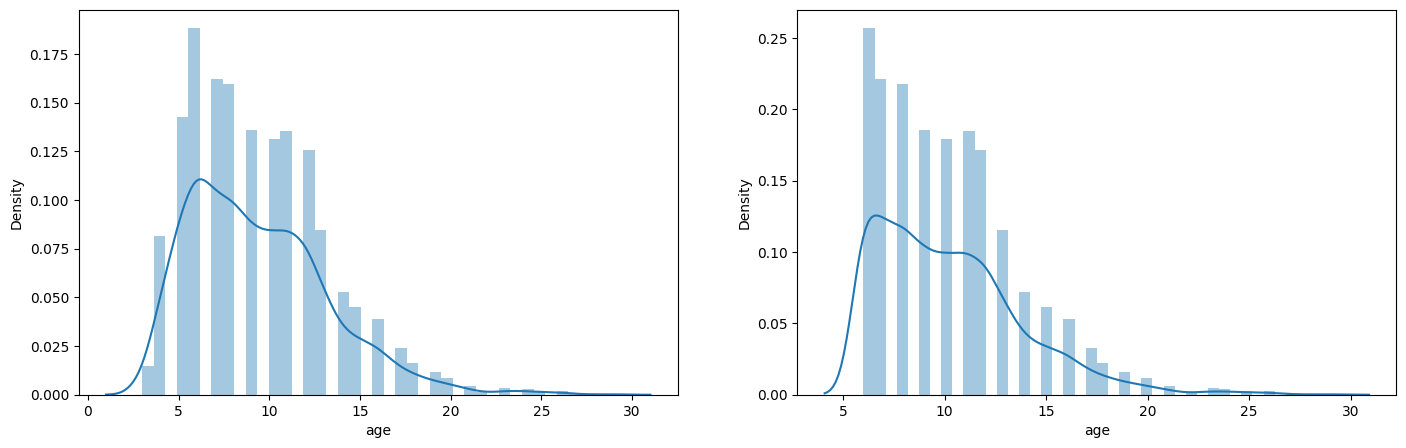

In [28]:
plt.figure(figsize=[17,5])

plt.subplot(1,2,1)
sns.distplot(Ndata['age'])

plt.subplot(1,2,2)
q = Ndata['age'].quantile(0.07)
data_1 = Ndata[Ndata['age']>q]
sns.distplot(data_1['age'])

plt.show()

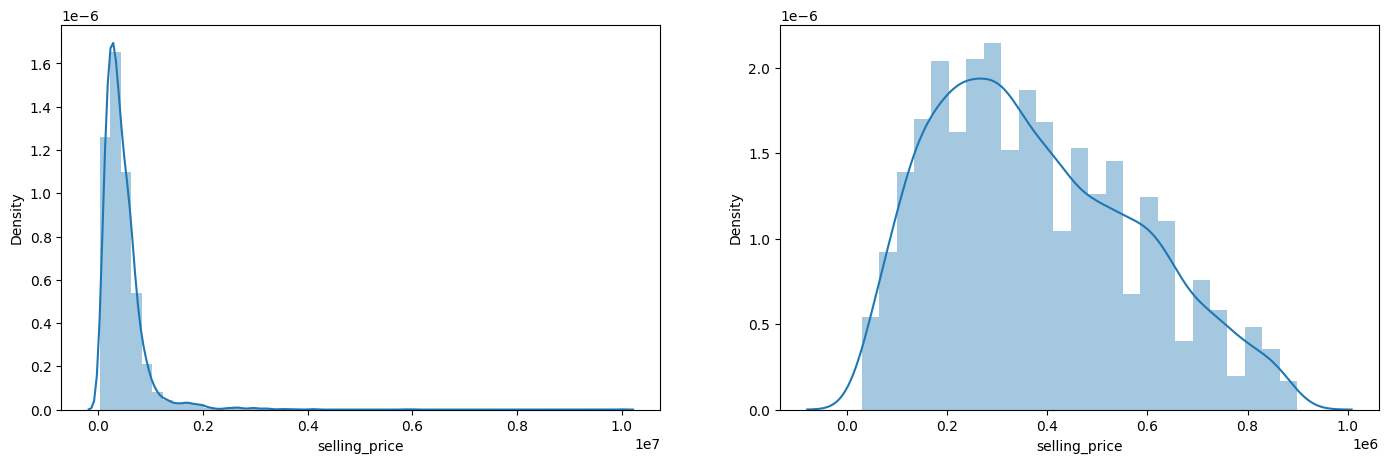

In [29]:
plt.figure(figsize=[17,5])

plt.subplot(1,2,1)
sns.distplot(data_1['selling_price'])

plt.subplot(1,2,2)
q = data_1['selling_price'].quantile(0.93)
data_2 = data_1[data_1['selling_price']<q]
sns.distplot(data_2['selling_price'])

plt.show()

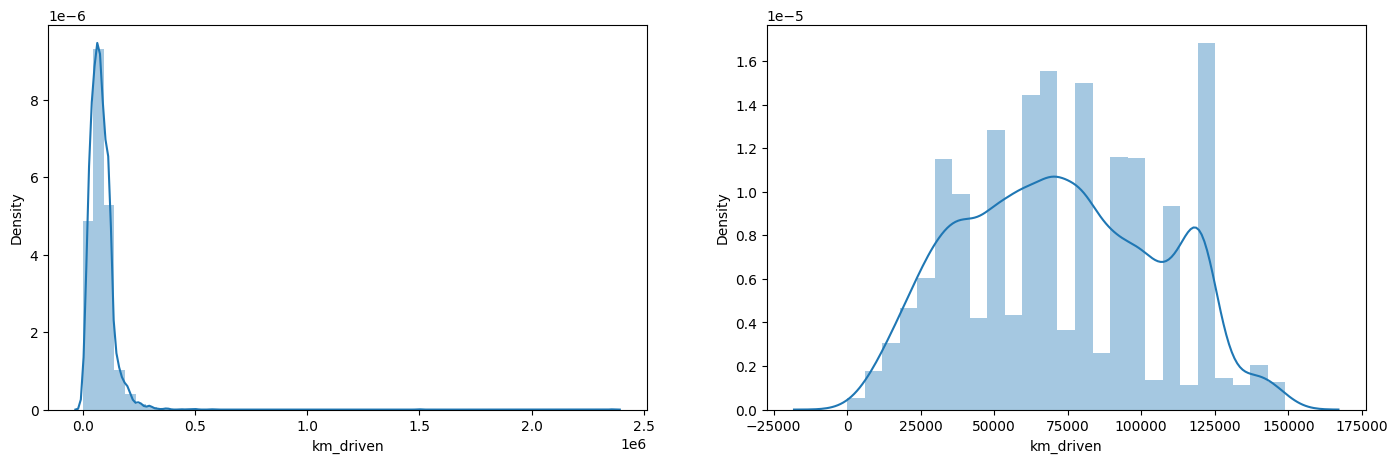

In [30]:
plt.figure(figsize=[17,5])

plt.subplot(1,2,1)
sns.distplot(data_2['km_driven'])

plt.subplot(1,2,2)
q = data_2['km_driven'].quantile(0.93)
data_3 = data_2[data_2['km_driven']<q]
sns.distplot(data_3['km_driven'])

plt.show()

In [31]:
data_cleaned = data_3.reset_index(drop=True)

In [32]:
data_cleaned.describe()

,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,4886.0,4886.0,4886.0,4886.0,4886.0,4886.0,4886.0,4886.0,4886.0,4886.0,4886.0
mean,10.290012,380108.64081,72409.948015,0.508391,0.086574,0.03991,0.57675,19.680229,1353.640606,81.303372,5.355506
std,3.597681,201458.28654,32901.074035,0.551012,0.292653,0.195768,0.757186,3.867614,435.414412,24.461384,0.933784
min,6.0,29999.0,1.0,0.0,0.0,0.0,0.0,0.0,624.0,32.8,4.0
25%,7.0,220000.0,48000.0,0.0,0.0,0.0,0.0,17.0025,1120.0,67.04,5.0
50%,10.0,350000.0,70000.0,0.0,0.0,0.0,0.0,19.7,1248.0,76.8,5.0
75%,12.0,525000.0,100000.0,1.0,0.0,0.0,1.0,22.54,1495.0,90.0,5.0
max,29.0,899000.0,149000.0,3.0,2.0,1.0,3.0,33.44,2997.0,258.0,14.0


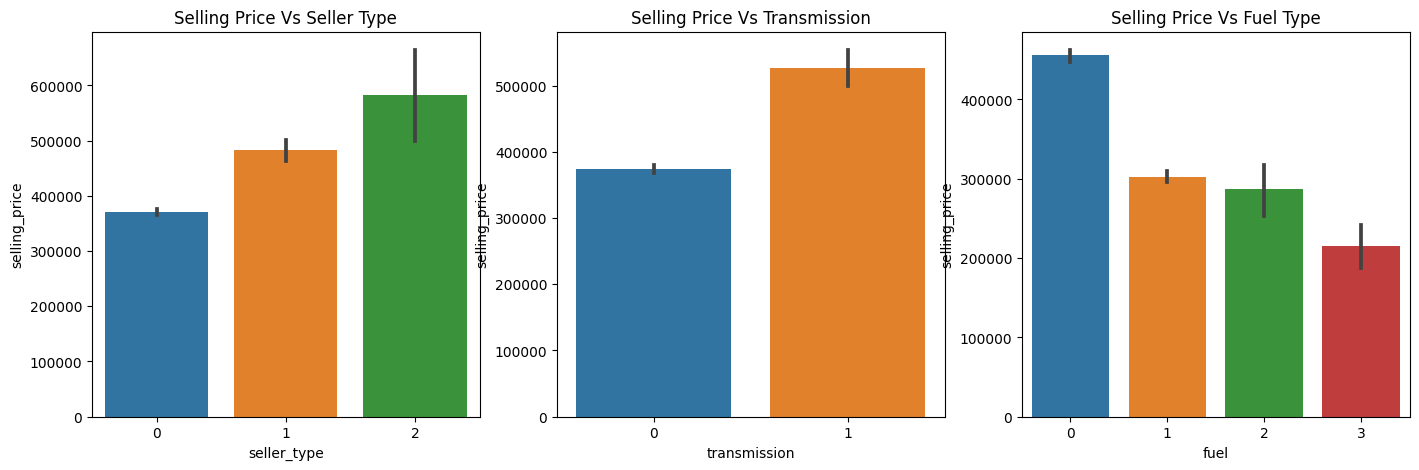

In [33]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])

plt.subplot(1,3,1)
sns.barplot(x='seller_type', y='selling_price', data=data_cleaned)
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='transmission', y='selling_price', data=data_cleaned)
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='fuel', y='selling_price', data=data_cleaned)
plt.title('Selling Price Vs Fuel Type')

plt.show()

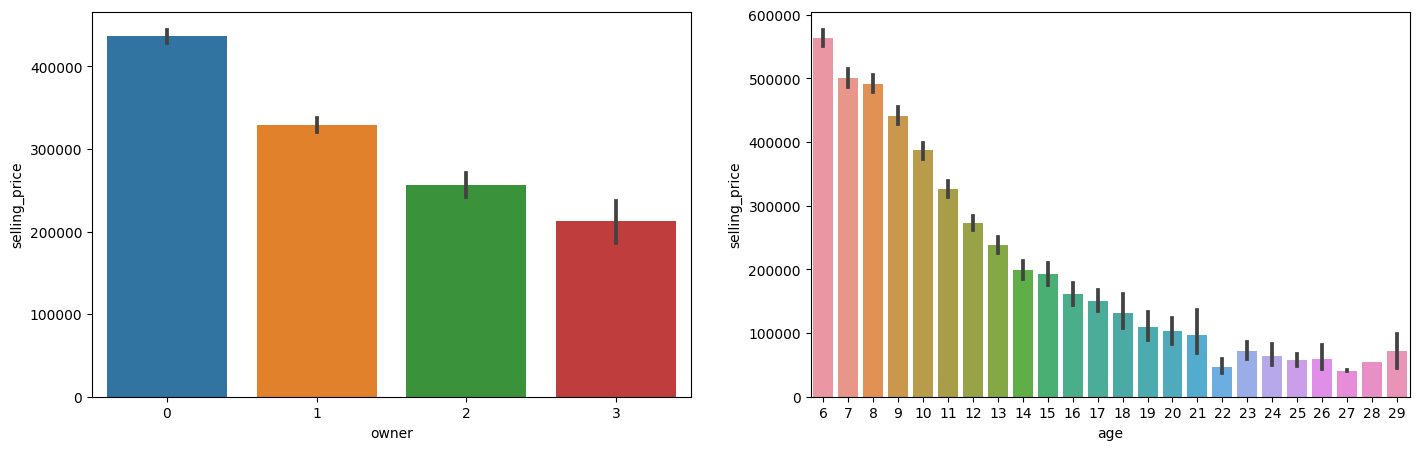

In [34]:
plt.figure(figsize=[17,5])

plt.subplot(1,2,1)
sns.barplot(x='owner', y='selling_price', data=data_cleaned)

plt.subplot(1,2,2)
sns.barplot(x='age', y='selling_price', data=data_cleaned)

plt.show()

In [35]:
data_cleaned

,age,CompanyName,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,9,Maruti,450000,145500,0,0,0,0,23.4,1248,74.0,190Nm@ 2000rpm,5
1,9,Skoda,370000,120000,0,0,0,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,17,Honda,158000,140000,1,0,0,2,17.7,1497,78.0,"12.7@ 2,700(kgm@ rpm)",5
3,13,Hyundai,225000,127000,0,0,0,0,23.0,1396,90.0,22.4 kgm at 1750-2750rpm,5
4,16,Maruti,130000,120000,1,0,0,0,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,10,Maruti,260000,50000,1,0,0,1,18.9,998,67.1,90Nm@ 3500rpm,5
4882,9,Hyundai,475000,80000,0,0,0,1,22.54,1396,88.73,219.7Nm@ 1500-2750rpm,5
4883,10,Hyundai,320000,110000,1,0,0,0,18.5,1197,82.85,113.7Nm@ 4000rpm,5
4884,16,Hyundai,135000,119000,0,0,0,3,16.8,1493,110.0,"24@ 1,900-2,750(kgm@ rpm)",5


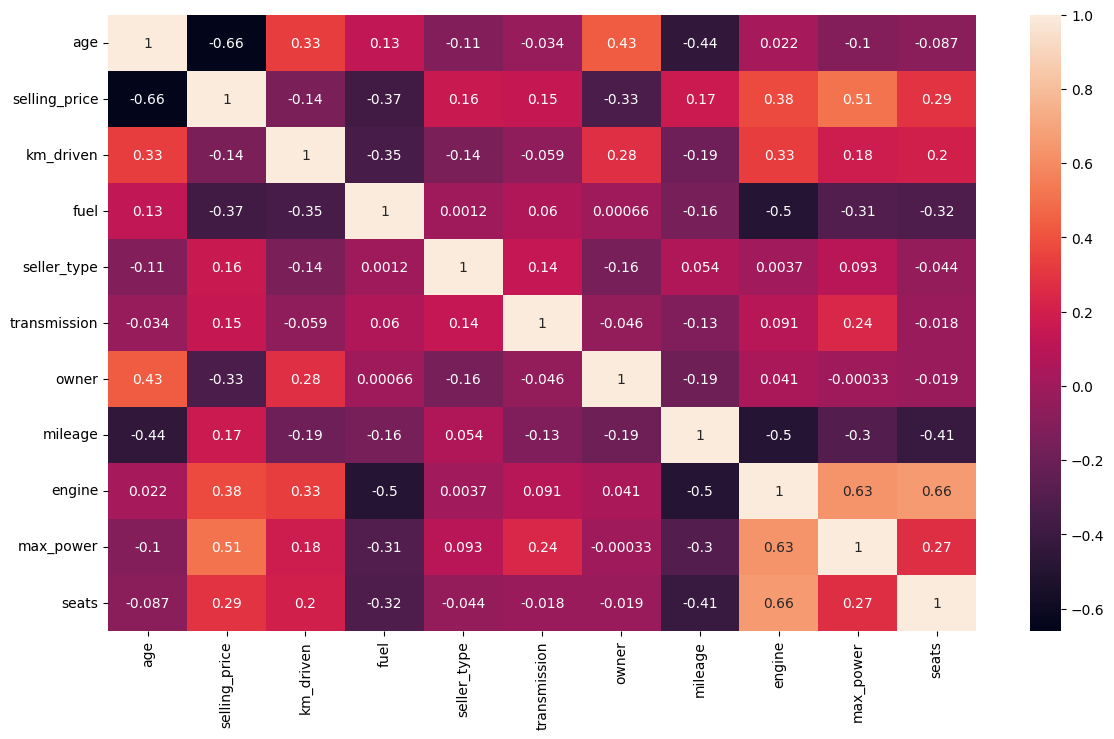

In [36]:
#visulaize the null values the (Heat Map)
#A heatmap is an interesting visualization that helps to know the intensity of the data. 
#It transmits this information using different colors and gradients. 
plt.figure(figsize = (14, 8))
sns.heatmap(data_cleaned.corr(), annot = True)
plt.show()

# Data Pre-processing #

In [37]:
# Splitting the data to Numerical Features and srring Features
num_features = list(data_cleaned.select_dtypes('number'))
num_features.remove('selling_price')

str_features = list(data_cleaned.select_dtypes('string'))


print(f'The Numerical Features: {num_features}')
print(f'The String Features: {str_features}')

The Numerical Features: ['age', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
The String Features: ['CompanyName', 'torque']


In [38]:
# taking a copy from data
data_modeling = data_cleaned.copy()

# define dataset
X, y = data_modeling.drop("selling_price",axis=1) , data_modeling["selling_price"] 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# numerical pipeline
num_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'median'),
                             StandardScaler()
                            )
# string pipeline
str_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'most_frequent'),
                             OneHotEncoder()
                            )

# Combine the numerical pipeline and string pipeline in a one Pipeline 
preprocessor = ColumnTransformer([
                                  ('numerical', num_pipeline, num_features), 
                                  ('string', str_pipeline, str_features)
                                ])
    
# Fitting the training data               
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'km_driven', 'fuel', 'seller_type',
                                  'transmission', 'owner', 'mileage', 'engine',
                                  'max_power', 'seats']),
                                ('string',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['CompanyName', 'torque'])])

In [40]:
# Convert categorical variables to dummy variables in the training data
X_train_transformed = pd.get_dummies(X_train)

# Convert categorical variables to dummy variables in the testing data
X_test_transformed = pd.get_dummies(X_test)

In [41]:
# Align columns of the testing data with the training data
X_test_transformed = X_test_transformed.reindex(columns=X_train_transformed.columns, fill_value=0)

# Modeling #

In [42]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

### Linear regression (OLS method) ###

In [43]:
# Linear Regression Model
lin_reg = LinearRegression()

# Model Fitting
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [44]:
# Training the Linear Regression Model 

# Predictions of X_train
lr_pred_tarin = lin_reg.predict(X_train_transformed)

print("Training Accuracy of Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lr_pred_tarin)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lr_pred_tarin))}')
print(f'R-Squered Training       :  {round(r2_score(y_train, lr_pred_tarin) * 100, 2)} %')

Training Accuracy of Linear Regression: 

Mean Absolute Error      :  53054.984768079004
Root Mean Squared  Error :  70382.60687074174
R-Squered Training       :  87.79 %


In [45]:
# Cross Validation for Linear Regression Model
lin_reg_scores = cross_val_score(lin_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Linear Regression Accuracy          :  {lin_reg_scores}')
print(f'Linear Regression Standard Deviation:  {round(lin_reg_scores.std(), 2)}')
print(f'Linear Regression Accuracy Mean     :  {round(lin_reg_scores.mean() * 100, 2)} %')

Linear Regression Accuracy          :  [ 8.51453705e-01  8.41437613e-01  8.30057968e-01  8.49856266e-01
 -5.59191447e+10  8.10007025e-01  8.17043711e-01  8.47044855e-01]
Linear Regression Standard Deviation:  18493518784.49
Linear Regression Accuracy Mean     :  -698989308062.89 %


In [46]:
#Testing the Linear Regression Model 

# Predictions of X_test
lr_pred_test = lin_reg.predict(X_test_transformed)

print("Tasting Accuracy for Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lr_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lr_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lr_pred_test) * 100, 2)} %')

Tasting Accuracy for Linear Regression: 

Mean Absolute Error      :  61413.65874764151
Root Mean Squared  Error :  82561.08132558735
R-Squered Testing        :  83.21 %


### Polynomial Regression ###

In [47]:
# Linear Regression Model with Polynomial Features
poly_reg = Pipeline([('poly_features', PolynomialFeatures(degree = 2)),('lin_reg', LinearRegression())])

# Model Fitting
poly_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [48]:
# Training the Polynomial Regression Model 

# Predictions of X_train
poly_pred_train = poly_reg.predict(X_train_transformed)

print("Training Accuracy for Polynomial Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, poly_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, poly_pred_train))}')
print(f'R-Squered Training       :  {round(r2_score(y_train, poly_pred_train) * 100, 2)} %')

Training Accuracy for Polynomial Regression: 

Mean Absolute Error      :  33946.59602626893
Root Mean Squared  Error :  48863.85963895871
R-Squered Training       :  94.11 %


In [49]:
# Cross Validation for Polynomial Regression Model
poly_reg_scores = cross_val_score(poly_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Polynomial Regression Accuracy          :  {poly_reg_scores}')
print(f'Polynomial Regression Standard Deviation:  {round(poly_reg_scores.std(), 2)}')
print(f'Polynomial Regression Accuracy Mean     :  {round(poly_reg_scores.mean() * 100, 2)} %')

Polynomial Regression Accuracy          :  [-7.46330381e+05 -1.27522855e+03 -1.40381424e+05 -9.12281706e+05
 -1.15591196e+06 -3.26681850e+06 -8.22900040e+04 -9.55467106e+03]
Polynomial Regression Standard Deviation:  1027096.48
Polynomial Regression Accuracy Mean     :  -78935548.46 %


In [50]:
#Testing the Polynomial Regression Model 

# Predictions of X_test
poly_pred_test = poly_reg.predict(X_test_transformed)

print("Tasting Accuracy for Polynomial Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, poly_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, poly_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, poly_pred_test) * 100, 2)} %')

Tasting Accuracy for Polynomial Regression: 

Mean Absolute Error      :  4688672.55741747
Root Mean Squared  Error :  58001074.8976621
R-Squered Testing        :  -8288659.89 %


### Linear regression (Lasso method) ###

In [51]:
# Lasso Regression Model with Polynomial Features
lasso_reg = Pipeline([('poly_features', PolynomialFeatures(degree = 2)),('lasso', Lasso(alpha = 0.5))])

# Model Fitting
lasso_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.5))])

In [52]:
# Training the Lasso Regression Model

# Predictions of X_train
lasso_pred_train = lasso_reg.predict(X_train_transformed)

print("Training Accuracy for Lasso Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lasso_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lasso_pred_train))}')
print(f'R Squared Error          :  {round(r2_score(y_train, lasso_pred_train) * 100, 2)} %')

Training Accuracy for Lasso Regression: 

Mean Absolute Error      :  35922.9062981786
Root Mean Squared  Error :  51259.85471104538
R Squared Error          :  93.52 %


In [53]:
# Cross Validation for Lasso Regression Model
lasso_reg_scores = cross_val_score(lasso_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Lasso Regression Accuracy          :  {lasso_reg_scores}')
print(f'Lasso Regression Standard Deviation:  {round(lasso_reg_scores.std(), 2)}')
print(f'Lasso Regression Accuracy Mean     :  {round(lasso_reg_scores.mean() * 100, 2)} %')

Lasso Regression Accuracy          :  [0.81301579 0.76927173 0.79328205 0.76357607 0.819653   0.83144355
 0.7485468  0.80166129]
Lasso Regression Standard Deviation:  0.03
Lasso Regression Accuracy Mean     :  79.26 %


In [54]:
#Testing the Lasso Regression Model

# Predictions of X_test
lasso_pred_test = lasso_reg.predict(X_test_transformed)

print("Tasting Accuracy for Lasso Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lasso_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lasso_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lasso_pred_test) * 100, 2)} %')

Tasting Accuracy for Lasso Regression: 

Mean Absolute Error      :  63648.4729218067
Root Mean Squared  Error :  97151.47327442582
R-Squered Testing        :  76.75 %


### Linear regression (Ridge method) ###

In [55]:
# Ridge Regression Model with Polynomial Features
ridge_reg = Pipeline([('poly_features', PolynomialFeatures(degree = 2)),('ridge', Ridge(alpha = 0.5))])

# Model Fitting
ridge_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.5))])

In [56]:
# Training the Ridge Regression Model 

# Predictions of X_train
ridge_pred_train = ridge_reg.predict(X_train_transformed)

print("Training Accuracy for Ridge Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, ridge_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, ridge_pred_train))}')
print(f'R-Squered Training          :  {round(r2_score(y_train, ridge_pred_train) * 100, 2)} %')

Training Accuracy for Ridge Regression: 

Mean Absolute Error      :  57582.183642000186
Root Mean Squared  Error :  75975.48822003709
R-Squered Training          :  85.77 %


In [57]:
# Cross Validation for Ridge Regression Model
ridge_reg_scores = cross_val_score(ridge_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Ridge Regression Accuracy          :  {ridge_reg_scores}')
print(f'Ridge Regression Standard Deviation:  {round(ridge_reg_scores.std(), 2)}')
print(f'Ridge Regression Accuracy Mean     :  {round(ridge_reg_scores.mean() * 100, 2)} %')

Ridge Regression Accuracy          :  [0.67247661 0.81585967 0.69722316 0.75245702 0.78562474 0.79560057
 0.7433477  0.78857371]
Ridge Regression Standard Deviation:  0.05
Ridge Regression Accuracy Mean     :  75.64 %


In [58]:
#Testing the Ridge Regression Model 

# Predictions of X_test
ridge_pred_test = ridge_reg.predict(X_test_transformed)

print("Tasting Accuracy for Ridge Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, ridge_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, ridge_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, ridge_pred_test) * 100, 2)} %')

Tasting Accuracy for Ridge Regression: 

Mean Absolute Error      :  68296.11688355451
Root Mean Squared  Error :  94485.03414589033
R-Squered Testing        :  78.0 %


### Linear regression (ElasticNetCV method) ###

In [59]:
# ElasticNetCV Regression Model with Polynomial Features
elasticnetcv_reg = Pipeline([('poly_features', PolynomialFeatures(degree = 2)),('elasticntcv', ElasticNetCV())])
 
# Model Fitting
elasticnetcv_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('elasticntcv', ElasticNetCV())])

In [60]:
# Training the ElasticNetCV Regression Model

# Predictions of X_train
elasticnetcv_pred_train = elasticnetcv_reg.predict(X_train_transformed)

print("Training Accuracy for ElasticNetCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, elasticnetcv_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, elasticnetcv_pred_train))}')
print(f'R-Squered Train          :  {round(r2_score(y_train, elasticnetcv_pred_train) * 100, 2)} %')

Training Accuracy for ElasticNetCV Regression: 

Mean Absolute Error      :  155890.85664204686
Root Mean Squared  Error :  188467.28745170016
R-Squered Train          :  12.45 %


In [66]:
# Cross Validation for ElasticNet Regression Model
elasticnetcv_reg_scores = cross_val_score(elasticnetcv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'ElasticNetCV Regression Accuracy          :  {elasticnetcv_reg_scores}')
print(f'ElasticNetCV Regression Standard Deviation:  {round(elasticnetcv_reg_scores.std(), 2)}')
print(f'ElasticNetCV Regression Accuracy Mean     :  {round(elasticnetcv_reg_scores.mean() * 100, 2)} %')

ElasticNetCV Regression Accuracy          :  [0.13778118 0.10107547 0.12501427 0.14692243 0.08993512 0.11333148
 0.1367144  0.12883711]
ElasticNetCV Regression Standard Deviation:  0.02
ElasticNetCV Regression Accuracy Mean     :  12.25 %


In [67]:
#Testing the ElasticNetCV Regression Model

# Predictions of X_test
elasticnetcv_pred_test = elasticnetcv_reg.predict(X_test_transformed)

print("Tasting Accuracy for ElasticNetCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, elasticnetcv_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, elasticnetcv_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, elasticnetcv_pred_test) * 100, 2)} %')

Tasting Accuracy for ElasticNetCV Regression: 

Mean Absolute Error      :  154070.74913879012
Root Mean Squared  Error :  187771.91540504555
R-Squered Testing        :  13.13 %


### Models Summarization ###

In [68]:
# Linear Regression vs. Decision Tree Training and Testing Accuracy
Models_Summarization = pd.DataFrame(
                {
                  
                    'Training Accuracy': [round(r2_score(y_train, lr_pred_tarin) * 100, 2), 
                                          round(r2_score(y_train, poly_pred_train) * 100, 2), 
                                          round(r2_score(y_train, ridge_pred_train) * 100, 2), 
                                          round(r2_score(y_train, lasso_pred_train) * 100, 2), 
                                          round(r2_score(y_train, elasticnetcv_pred_train) * 100, 2)], 
               
                    'Teasting Accuracy': [round(r2_score(y_test, lr_pred_test) * 100, 2), 
                                         round(r2_score(y_test, poly_pred_test) * 100, 2), 
                                         round(r2_score(y_test, ridge_pred_test) * 100, 2),
                                         round(r2_score(y_test, lasso_pred_test) * 100, 2),
                                         round(r2_score(y_test, elasticnetcv_pred_test) * 100, 2)]
              
                }, 
              
                index = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression','Lasso Regression', 'ElasticNetCV Regression'])


In [69]:
Models_Summarization

,Training Accuracy,Teasting Accuracy
Linear Regression,87.79,83.21
Polynomial Regression,94.11,-8288659.89
Ridge Regression,85.77,78.00
Lasso Regression,93.52,76.75
ElasticNetCV Regression,12.45,13.13


# the results of prediction #

In [97]:
# Charger les données
car_data = pd.read_csv('Cleaned_Data.csv')


# Séparer les fonctionnalités (X) et la variable cible (y)
X = car_data.drop(['selling_price','CompanyName','torque'], axis=1)
y = car_data['selling_price']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de régression Lasso
lasso_reg = Lasso(alpha=0.1)

# Entraîner le modèle
lasso_reg.fit(X_train, y_train)

# Prédire les prix des voitures dans l'ensemble de test
y_pred = lasso_reg.predict(X_test)

# Évaluer les performances du modèle
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2) Score: ", r2)

Mean Absolute Error (MAE):  169051.54840640095
Root Mean Squared Error (RMSE):  274364.80856863386
R-squared (R2) Score:  0.6569485376476702


In [101]:
# Assume you have a new data point for which you want to predict the price
new_data = [[3,2,2552.3,2,2,3,562,541,85,223,5]]  # Provide the values of the features for the new data point

# Predict the price using the trained Lasso regression model
predicted_price = lasso_reg.predict(new_data)

# Display the predicted price
print("Predicted Price:", predicted_price)

Predicted Price: [1948668.96374523]
